In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import math
import localizer_functions as lf # custom stuff
import sys

now we are using all those images to do our analysis

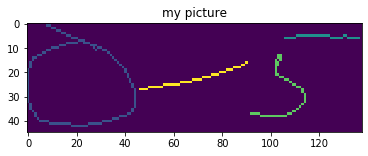

In [7]:
#src = cv2.imread('../images_no_copies/div/div_665.jpg')
src = cv2.imread('../generated_images/0-5/1.png')
num_labels, labels, stats, centroids = prepare_image(src)


plt.imshow(labels)
plt.title("my picture")
plt.show()

show the upper left corner of every detected component

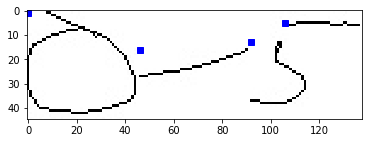

In [8]:
plt.imshow(src)
for i in range(1, num_labels):
    # get stats for i-th number by using stats[i, PROPERTY]
    left = stats[i, cv2.CC_STAT_LEFT]
    top = stats[i, cv2.CC_STAT_TOP]
    plt.plot(left, top, 'bs')
    #print(left, top)
plt.show()

overlaps is a list of tuples, with each tuple being (i, list) where the list is a list of digits which start within the x range of the i-th digit

In [9]:
division_symbols_pairs, digit_indices = split_division_rest(num_labels, stats)

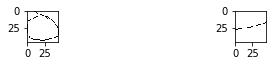

In [10]:
# print all digits
digits = []
for i in digit_indices:
    number = localizer_functions.extract_number(stats, src, i)
    squared = localizer_functions.make_square_out_of(number)
    digits.append(squared)
    num = plt.subplot(6,5,i)
    #cv2.imwrite(str(i) + "-sq.jpg", squared)
    num.imshow(squared)
plt.show()

In [11]:
div_sym = get_division_symbols(division_symbols_pairs, stats, src)
#print(div_sym[0][1])
all_symbols = digits + [div_sym[x][1] for x in range(0, len(div_sym))]
#all_symbols.append(digits)
#all_symbols.append(division_symbols)
print(len(all_symbols))
print(len(digits))
plt.show()

3
2


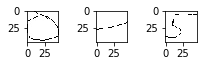

In [12]:
i = 1
for img in all_symbols:
    num = plt.subplot(6,5,i)
    i = i + 1
    
    cv2.imwrite( f"{i}.png", img)
    num.imshow(img)
plt.show()

In [13]:
equations = localizer_functions.get_all_data_cv('../generated_images')



print(len(equations))
count = 0
err_cnt = 0
for equ_type in equations: #[equations[x] for x in equations]:
    #print(equ_type)
    for equ in equations[equ_type]:
        count += 1
        # convert images to grayscale etc
        num_labels, labels, stats, centroids = prepare_image(equ)
        # split division symbols and rest into two indice pairs
        division_symbols_pairs, digit_indices = split_division_rest(num_labels, stats)
        # get the digits
        digits = []
        for i in digit_indices:
            number = localizer_functions.extract_number(stats, equ, i)
            squared = localizer_functions.make_square_out_of(number)
            digits.append((i, squared))
        # concatenate all symbols
        all_symbols = digits + get_division_symbols(division_symbols_pairs, stats, equ)
        # sort the symbols by the x coordinate, leading to a correctly sorted array
        sorted_symbols = sorted(all_symbols, key = get_x_coord)

        if all_symbols != sorted_symbols:
            pass
            #print(f"{equ_type} had a misclassified order")

        if len(all_symbols) != 3:
            err_cnt += 1
            print(f"{len(all_symbols)} is the length of all symbols, name {equ_type}")
            for i in range(0, len(all_symbols)):
                cv2.imwrite(f"errs/{equ_type}-{err_cnt}-err-{len(all_symbols)}-syms{i}.png", all_symbols[i][1])
print(count)
print(err_cnt)


Test
400
4 is the length of all symbols, name 8+4
4 is the length of all symbols, name 1times4
4 is the length of all symbols, name 4div9
4 is the length of all symbols, name 4div9
5 is the length of all symbols, name 4div9
5 is the length of all symbols, name 4div9
4 is the length of all symbols, name 4div9
4 is the length of all symbols, name 4times0
4 is the length of all symbols, name 7div8
4 is the length of all symbols, name 7div8
4 is the length of all symbols, name 0div2
4 is the length of all symbols, name 0div2
4 is the length of all symbols, name 0div2
4 is the length of all symbols, name 0div9
4 is the length of all symbols, name 0div6
4 is the length of all symbols, name 0div6
4 is the length of all symbols, name 4times9
4 is the length of all symbols, name 2div4
4 is the length of all symbols, name 2div4
4 is the length of all symbols, name 2div4
5 is the length of all symbols, name 1div1
4 is the length of all symbols, name 1div1
4 is the length of all symbols, name 1div

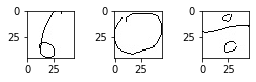

In [14]:
i = 1
for (_, img) in all_symbols:
    num = plt.subplot(4,4,i)
    cv2.imwrite( f"{i}.png", img)
    i = i + 1
    
    num.imshow(img)
plt.show()

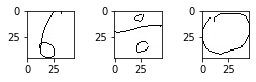

In [15]:
i = 1
for (_, img) in sorted_symbols:
    num = plt.subplot(4,4,i)
    cv2.imwrite( f"{i}.png", img)
    i = i + 1
    
    num.imshow(img)
plt.show()